# Air Passengers Time Series Forecasting


In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
airpas = pd.read_csv('/content/AirPassengers.csv')

In [3]:
airpas.shape

(144, 2)

In [4]:
airpas.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


# Problem Statement

 We need to forecast the passengers for the next 12 Months (for year 1961)

In [5]:
airpas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [6]:
# checking null values
airpas.isnull().sum()

,0
Month,0
Passengers,0


In [7]:
# changing Month column data type 'Object' to 'Date'
airpas.Month = pd.to_datetime(airpas.Month, infer_datetime_format=True)

In [8]:
airpas = airpas.set_index(['Month'])

In [9]:
airpas.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


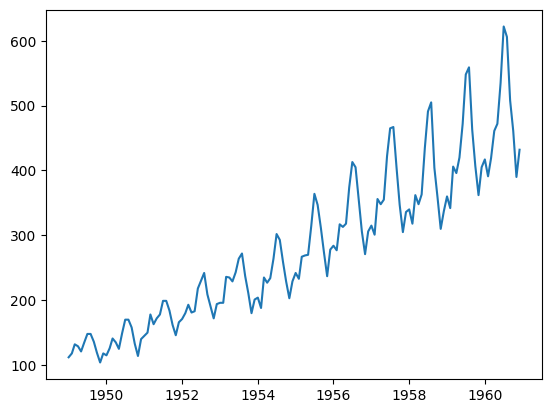

In [10]:
plt.plot(airpas)

# If series is not stationary then we will make it stationary by using differencing method

# Differencing Method


In [11]:
airpas.diff()

,Passengers
Month,
1949-01-01,NaN
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
1949-06-01,14.0
1949-07-01,13.0
1949-08-01,0.0
1949-09-01,-12.0


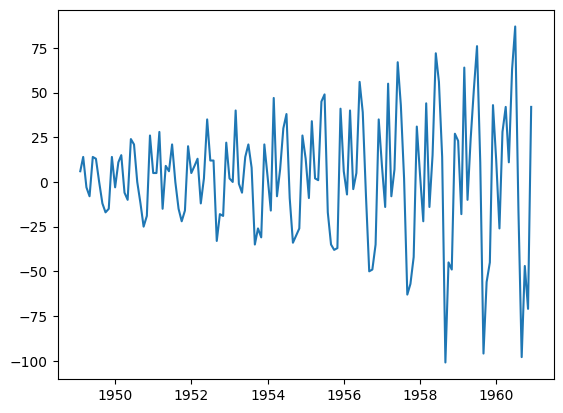

In [12]:
plt.plot(airpas.diff())

After first level of differencing we can see the series is still not stationary

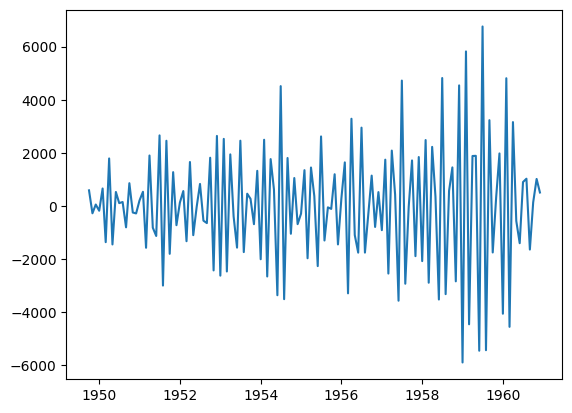

In [13]:
plt.plot(airpas.diff().diff().diff().diff().diff().diff().diff().diff().diff())

Even after multiple of differencing the series is still not stationary

# Using log to Make Series Stationary


In [14]:
airpas_log = np.log(airpas)

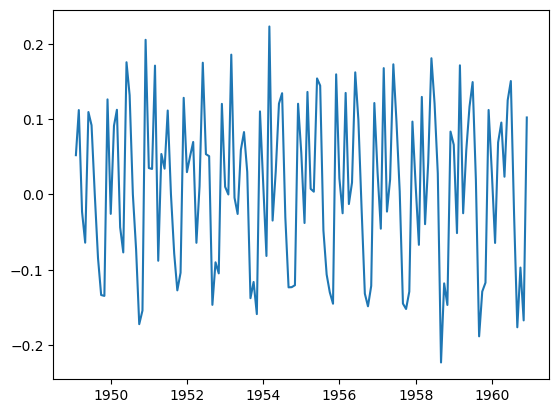

In [15]:
plt.plot(airpas_log.diff())


1.   After first level of diff series got stationary so value of d=1
2.   Here we need to find the value of P and Q



# Importing ACF and PACF Plots

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

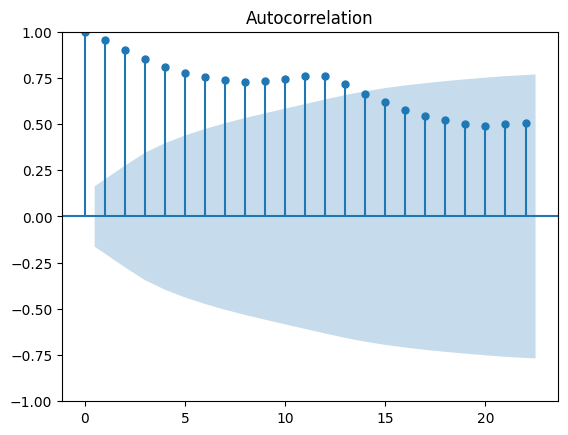

In [17]:
plot_acf(airpas_log.Passengers);

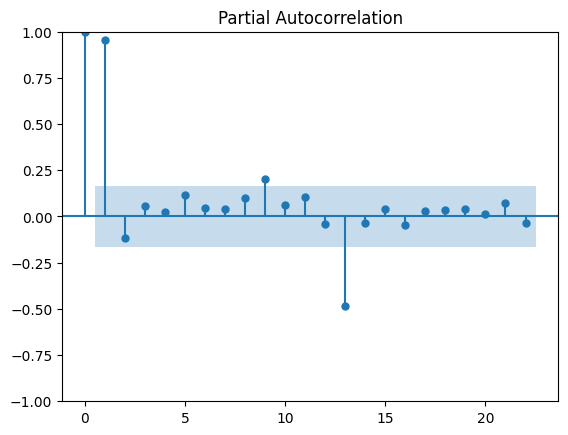

In [18]:
plot_pacf(airpas_log.Passengers);



1.   As ACF declines slowly and PACF declines sharply then we called it as AR Process
2.   For ARIMA we got the values as p=2, d=1, q=0



# Model Building by using SARIMAX

In [19]:
#!pip install pmdarima

In [20]:
#pip install "numpy<2"

In [21]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import pmdarima
from pmdarima import auto_arima

In [22]:
result = seasonal_decompose(airpas_log)

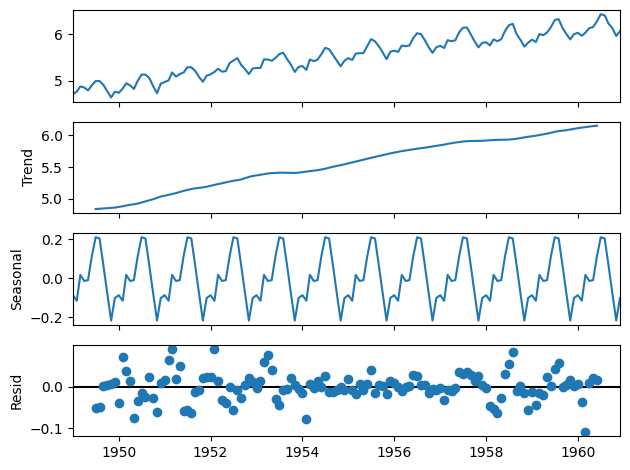

In [23]:
result.plot();

# Using auto_arima


In [24]:
auto_arima(airpas_log, seasonal=True, m=12)

ARIMA(order=(2, 0, 0), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True)

In [25]:
model_sarima = SARIMAX(airpas_log, order=(2,0,0), seasonal_order=(0,1,1,12))

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [26]:
airpas_model = model_sarima.fit()

In [27]:
pred_values = airpas_model.predict(start=144, end=155)

In [28]:
pred_values

,predicted_mean
1961-01-01,6.103752
1961-02-01,6.045644
1961-03-01,6.162219
1961-04-01,6.188680
1961-05-01,6.220668
1961-06-01,6.355536
1961-07-01,6.492849
1961-08-01,6.487145
1961-09-01,6.307594
1961-10-01,6.190710


In [29]:
pred_values1 = np.exp(pred_values)
pred_values1

,predicted_mean
1961-01-01,447.533799
1961-02-01,422.269558
1961-03-01,474.479895
1961-04-01,487.202375
1961-05-01,503.039055
1961-06-01,575.670666
1961-07-01,660.402032
1961-08-01,656.646068
1961-09-01,548.723001
1961-10-01,488.192583


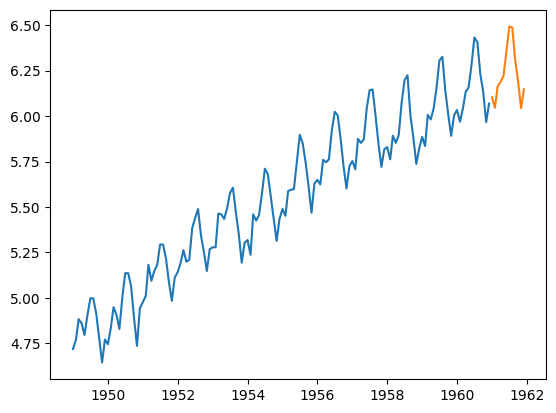

In [30]:
plt.plot(airpas_log)
plt.plot(pred_values)

# Creating DataFrame

In [31]:
df = pd.DataFrame()

df['predicted'] = pred_values1

date_for_pred = ['1961-01-01', '1961-02-01', '1961-03-01', '1961-04-01', '1961-05-01', '1961-06-01', '1961-07-01', '1961-08-01', '1961-09-01', '1961-10-01', '1961-11-01',
                 '1961-12-01']

df['Month'] = date_for_pred

df.Month = pd.to_datetime(df.Month, infer_datetime_format=True)
df = df.set_index(['Month'])

In [32]:
df.head()

,predicted
Month,
1961-01-01,447.533799
1961-02-01,422.269558
1961-03-01,474.479895
1961-04-01,487.202375
1961-05-01,503.039055


<Axes: xlabel='Month'>

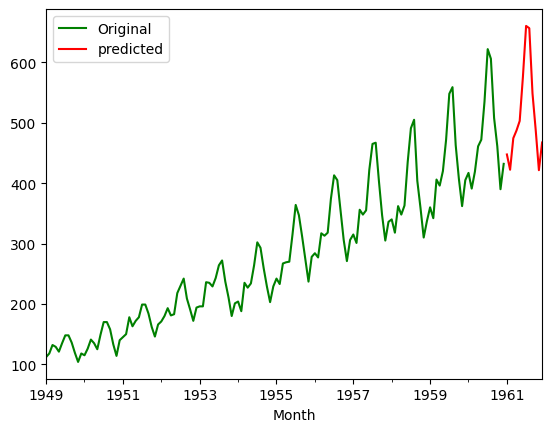

In [33]:
airpas['Passengers'].plot(legend = True, label = 'Original', color = 'green')
df['predicted'].plot(legend = True, label = 'predicted', color = 'red')